In [1]:
#IMPORTING ALL THE NEEDED LIBRARIES

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

from math import sqrt
from math import log

from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV


In [2]:
#IMPORTING THE DATASET AND CONVERTING ALL '?' TO NA VALUES

train_raw = pd.read_csv('train.csv', sep = ',', na_values = '?')

In [3]:
train_raw.head()

,ID,Age,Worker Class,IC,OC,Schooling,Timely Income,Enrolled,Married_Life,MIC,...,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Fill,Vet_Benefits,Weaks,WorkingPeriod,Class
0,149068,7,NaN,0,0,Edu4,0,NaN,MS3,NaN,...,c24,c24,c24,Case1,0,NaN,0,0,94,0
1,174234,40,WC3,43,26,Edu1,0,NaN,MS4,MIC_D,...,c24,c24,c24,Case1,0,NaN,2,52,95,0
2,70782,25,WC2,33,19,Edu5,0,NaN,MS4,MIC_N,...,c24,c24,c24,Case1,2,NaN,2,48,94,0
3,5542,15,NaN,0,0,Edu16,0,NaN,MS3,NaN,...,c24,c24,c24,Case1,0,NaN,2,0,94,0
4,126542,48,WC2,33,29,Edu16,0,NaN,MS4,MIC_N,...,c23,c23,c23,Case3,0,NaN,2,52,95,0


In [4]:
train_raw.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
ID               100000 non-null int64
Age              100000 non-null int64
Worker Class     49776 non-null object
IC               100000 non-null int64
OC               100000 non-null int64
Schooling        100000 non-null object
Timely Income    100000 non-null int64
Enrolled         6323 non-null object
Married_Life     100000 non-null object
MIC              49528 non-null object
MOC              49528 non-null object
Cast             100000 non-null object
Hispanic         99560 non-null object
Sex              100000 non-null object
MLU              9413 non-null object
Reason           3104 non-null object
Full/Part        100000 non-null object
Gain             100000 non-null int64
Loss             100000 non-null int64
Stock            100000 non-null int64
Tax Status       100000 non-null object
Area             7833 non-null object
State            7481 non-null

In [5]:
train_raw.describe()

,ID,Age,IC,OC,Timely Income,Gain,Loss,Stock,Weight,NOP,Own/Self,Vet_Benefits,Weaks,WorkingPeriod,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,99915.723510,34.474430,15.347550,11.287630,54.865620,457.333960,37.835090,196.642430,1739.273784,1.952780,0.176000,1.514380,23.165140,94.501130,0.06292
std,57616.948402,22.290136,18.070418,14.445314,276.126324,4933.296536,272.612351,1948.889013,992.868296,2.363452,0.554641,0.851599,24.410034,0.500001,0.24282
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.670000,0.000000,0.000000,0.000000,0.000000,94.000000,0.00000
25%,50017.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.917500,0.000000,0.000000,2.000000,0.000000,94.000000,0.00000
50%,99939.500000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1617.075000,1.000000,0.000000,2.000000,8.000000,95.000000,0.00000
75%,149958.750000,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2189.805000,4.000000,0.000000,2.000000,52.000000,95.000000,0.00000
max,199522.000000,90.000000,51.000000,46.000000,9800.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.00000


In [6]:
train_raw.nunique()

ID               100000
Age                  91
Worker Class          8
IC                   52
OC                   47
Schooling            17
Timely Income       887
Enrolled              2
Married_Life          7
MIC                  23
MOC                  14
Cast                  5
Hispanic              9
Sex                   2
MLU                   2
Reason                5
Full/Part             8
Gain                129
Loss                107
Stock              1134
Tax Status            6
Area                  5
State                49
Detailed             37
Summary               8
Weight            64567
MSA                   8
REG                   7
MOVE                  8
Live                  2
PREV                  2
NOP                   7
Teen                  4
COB FATHER           42
COB MOTHER           42
COB SELF             42
Citizen               5
Own/Self              3
Fill                  2
Vet_Benefits          3
Weaks                53
WorkingPeriod   

## Data Preprocessing

In [7]:
#UNDERSTANDING THE DATASET AND LOOKING FOR ANAMOLIES

for col in train_raw.columns:
        print("Column Name: "+col + " Values: ",train_raw[col].unique())
        print()

Column Name: ID Values:  [149068 174234  70782 ...  61721 151161  23107]

Column Name: Age Values:  [ 7 40 25 15 48 51 35 11 27  6 22 20 80 38  3  4 31 33 16 50 23 39 46 19
 69 36 41 44 49 29 18 17 10 54 42  1 30 64 47 13 14 60 76 56 28  0 21 32
 72 24 62 68 45 63  9 74 71 61 26 37  2 65 52 81 12 67 43 34 57  8 78 59
 73  5 75 84 90 70 66 83 58 86 87 85 53 77 79 55 88 82 89]

Column Name: Worker Class Values:  [nan 'WC3' 'WC2' 'WC1' 'WC4' 'WC5' 'WC6' 'WC8' 'WC7']

Column Name: IC Values:  [ 0 43 33 37 45 42 29 41 34  2 31  9 13 40 36 19  1 35 39 38  4 12 32 44
  6 49 16 30 47 48 22 11 24  5  3 23 25 21 50 27  7 46 15 18 51 10  8 17
 28 26 14 20]

Column Name: OC Values:  [ 0 26 19 29 28  4 30  7  3 31  2 15 44 36 23 39 12 27 37 34 17 41 25 24
 35 18 32 38 16 33  6 11 10  8  1 42 40 14  5 43 22 13 45 21 20  9 46]

Column Name: Schooling Values:  ['Edu4' 'Edu1' 'Edu5' 'Edu16' 'Edu2' 'Edu15' 'Edu14' 'Edu9' 'Edu3' 'Edu6'
 'Edu8' 'Edu10' 'Edu7' 'Edu11' 'Edu17' 'Edu12' 'Edu13']

Column Name:

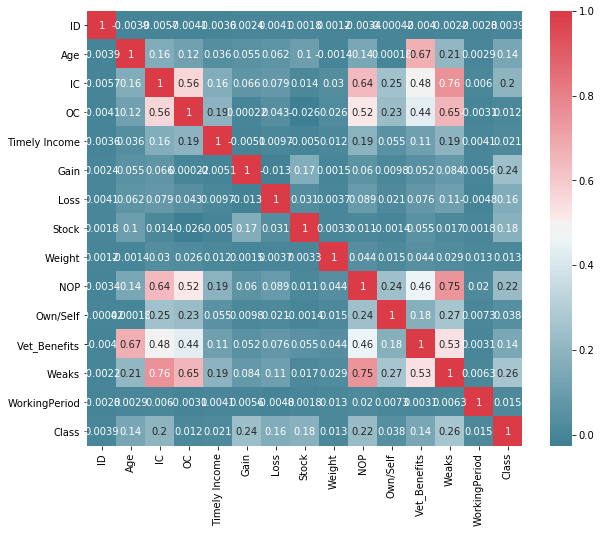

In [8]:
#CORRELATION HEAT MAP

f, ax = plt.subplots(figsize=(10, 8))
corr = train_raw.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot = True);

In [9]:
#REMOVING FEATURES WITH NUMBER OF MISSING VALUES > 50,000 OR 0.5 OF THE DATASET

train_raw  = train_raw[train_raw.columns[train_raw.isnull().mean() < 0.5]]

In [10]:
train_raw.describe()

,ID,Age,IC,OC,Timely Income,Gain,Loss,Stock,Weight,NOP,Own/Self,Vet_Benefits,Weaks,WorkingPeriod,Class
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,99915.723510,34.474430,15.347550,11.287630,54.865620,457.333960,37.835090,196.642430,1739.273784,1.952780,0.176000,1.514380,23.165140,94.501130,0.06292
std,57616.948402,22.290136,18.070418,14.445314,276.126324,4933.296536,272.612351,1948.889013,992.868296,2.363452,0.554641,0.851599,24.410034,0.500001,0.24282
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.670000,0.000000,0.000000,0.000000,0.000000,94.000000,0.00000
25%,50017.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1060.917500,0.000000,0.000000,2.000000,0.000000,94.000000,0.00000
50%,99939.500000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1617.075000,1.000000,0.000000,2.000000,8.000000,95.000000,0.00000
75%,149958.750000,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2189.805000,4.000000,0.000000,2.000000,52.000000,95.000000,0.00000
max,199522.000000,90.000000,51.000000,46.000000,9800.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.00000


In [11]:
train_raw

,ID,Age,IC,OC,Schooling,Timely Income,Married_Life,Cast,Hispanic,Sex,...,NOP,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Vet_Benefits,Weaks,WorkingPeriod,Class
0,149068,7,0,0,Edu4,0,MS3,TypeD,HA,M,...,0,c24,c24,c24,Case1,0,0,0,94,0
1,174234,40,43,26,Edu1,0,MS4,TypeA,HA,F,...,6,c24,c24,c24,Case1,0,2,52,95,0
2,70782,25,33,19,Edu5,0,MS4,TypeA,HA,F,...,2,c24,c24,c24,Case1,2,2,48,94,0
3,5542,15,0,0,Edu16,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,2,0,94,0
4,126542,48,33,29,Edu16,0,MS4,TypeB,HA,M,...,2,c23,c23,c23,Case3,0,2,52,95,0
5,101318,51,37,28,Edu1,0,MS1,TypeD,HA,M,...,6,c18,c18,c18,Case3,0,2,52,95,0
6,137659,35,45,4,Edu5,0,MS4,TypeA,HA,M,...,6,c24,c24,c24,Case1,0,2,52,94,1
7,199127,11,0,0,Edu4,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,0,0,94,0
8,132886,27,42,30,Edu2,0,MS4,TypeA,HA,F,...,4,c24,c24,c24,Case1,0,2,40,95,0
9,186141,6,0,0,Edu4,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,0,0,94,0


In [12]:
train_raw.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
ID               100000 non-null int64
Age              100000 non-null int64
IC               100000 non-null int64
OC               100000 non-null int64
Schooling        100000 non-null object
Timely Income    100000 non-null int64
Married_Life     100000 non-null object
Cast             100000 non-null object
Hispanic         99560 non-null object
Sex              100000 non-null object
Full/Part        100000 non-null object
Gain             100000 non-null int64
Loss             100000 non-null int64
Stock            100000 non-null int64
Tax Status       100000 non-null object
Detailed         100000 non-null object
Summary          100000 non-null object
Weight           100000 non-null float64
NOP              100000 non-null int64
COB FATHER       96628 non-null object
COB MOTHER       96943 non-null object
COB SELF         98303 non-null object
Citizen          10000

In [13]:
train_raw.nunique()

ID               100000
Age                  91
IC                   52
OC                   47
Schooling            17
Timely Income       887
Married_Life          7
Cast                  5
Hispanic              9
Sex                   2
Full/Part             8
Gain                129
Loss                107
Stock              1134
Tax Status            6
Detailed             37
Summary               8
Weight            64567
NOP                   7
COB FATHER           42
COB MOTHER           42
COB SELF             42
Citizen               5
Own/Self              3
Vet_Benefits          3
Weaks                53
WorkingPeriod         2
Class                 2
dtype: int64

In [14]:
#DROPPING ALL THE TUPLES CONTAINING NA VALUES

train_raw.dropna(inplace = True)

In [15]:
train_raw

,ID,Age,IC,OC,Schooling,Timely Income,Married_Life,Cast,Hispanic,Sex,...,NOP,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Vet_Benefits,Weaks,WorkingPeriod,Class
0,149068,7,0,0,Edu4,0,MS3,TypeD,HA,M,...,0,c24,c24,c24,Case1,0,0,0,94,0
1,174234,40,43,26,Edu1,0,MS4,TypeA,HA,F,...,6,c24,c24,c24,Case1,0,2,52,95,0
2,70782,25,33,19,Edu5,0,MS4,TypeA,HA,F,...,2,c24,c24,c24,Case1,2,2,48,94,0
3,5542,15,0,0,Edu16,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,2,0,94,0
4,126542,48,33,29,Edu16,0,MS4,TypeB,HA,M,...,2,c23,c23,c23,Case3,0,2,52,95,0
5,101318,51,37,28,Edu1,0,MS1,TypeD,HA,M,...,6,c18,c18,c18,Case3,0,2,52,95,0
6,137659,35,45,4,Edu5,0,MS4,TypeA,HA,M,...,6,c24,c24,c24,Case1,0,2,52,94,1
7,199127,11,0,0,Edu4,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,0,0,94,0
8,132886,27,42,30,Edu2,0,MS4,TypeA,HA,F,...,4,c24,c24,c24,Case1,0,2,40,95,0
9,186141,6,0,0,Edu4,0,MS3,TypeA,HA,F,...,0,c24,c24,c24,Case1,0,0,0,94,0


In [16]:
train_raw.columns

Index(['ID', 'Age', 'IC', 'OC', 'Schooling', 'Timely Income', 'Married_Life',
       'Cast', 'Hispanic', 'Sex', 'Full/Part', 'Gain', 'Loss', 'Stock',
       'Tax Status', 'Detailed', 'Summary', 'Weight', 'NOP', 'COB FATHER',
       'COB MOTHER', 'COB SELF', 'Citizen', 'Own/Self', 'Vet_Benefits',
       'Weaks', 'WorkingPeriod', 'Class'],
      dtype='object')

In [17]:
#DROPPING 'ID' COLUMN

train_raw.drop('ID', inplace = True, axis =1)

In [18]:
#LISTING THE NUMERICAL AND CATEGORICAL COLUMNS SEPARATELY

cols = train_raw.columns
num_cols = train_raw._get_numeric_data().columns
print ('Numerical Columns = ', list(num_cols))
cat_cols = list(set(cols) - set(num_cols))
print ('Categorical Columns = ',cat_cols)

Numerical Columns =  ['Age', 'IC', 'OC', 'Timely Income', 'Gain', 'Loss', 'Stock', 'Weight', 'NOP', 'Own/Self', 'Vet_Benefits', 'Weaks', 'WorkingPeriod', 'Class']
Categorical Columns =  ['Cast', 'Sex', 'COB MOTHER', 'Summary', 'COB FATHER', 'COB SELF', 'Citizen', 'Schooling', 'Full/Part', 'Detailed', 'Tax Status', 'Married_Life', 'Hispanic']


In [19]:
train_raw.head()

,Age,IC,OC,Schooling,Timely Income,Married_Life,Cast,Hispanic,Sex,Full/Part,...,NOP,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Vet_Benefits,Weaks,WorkingPeriod,Class
0,7,0,0,Edu4,0,MS3,TypeD,HA,M,FB,...,0,c24,c24,c24,Case1,0,0,0,94,0
1,40,43,26,Edu1,0,MS4,TypeA,HA,F,FC,...,6,c24,c24,c24,Case1,0,2,52,95,0
2,25,33,19,Edu5,0,MS4,TypeA,HA,F,FB,...,2,c24,c24,c24,Case1,2,2,48,94,0
3,15,0,0,Edu16,0,MS3,TypeA,HA,F,FB,...,0,c24,c24,c24,Case1,0,2,0,94,0
4,48,33,29,Edu16,0,MS4,TypeB,HA,M,FC,...,2,c23,c23,c23,Case3,0,2,52,95,0


In [20]:
#CHECKING FOR COUNT OF CLASSES
#NOTICED THAT CLASSES ARE HIGHLY IMBALANCED

train_raw['Class'].value_counts()

0    89519
1     5907
Name: Class, dtype: int64

In [21]:
#REMOVING CLASS COLUMN

target = 'Class'

X = train_raw.drop(target, axis = 1)
y = train_raw[target]

In [22]:
#SPLITTING THE TRAINING DATA INTO TRAINING AND VALIDATION SET USING TRAIN_TEST_SPLIT

X_train,X_cv,y_train,y_cv = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=True)
train = pd.concat([X_train,y_train],axis=1)
cv = pd.concat([X_cv,y_cv],axis=1)

In [23]:
X_train

,Age,IC,OC,Schooling,Timely Income,Married_Life,Cast,Hispanic,Sex,Full/Part,...,Weight,NOP,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Vet_Benefits,Weaks,WorkingPeriod
12187,31,43,31,Edu1,0,MS2,TypeC,HA,M,FB,...,960.76,6,c24,c24,c24,Case1,2,2,52,94
80661,43,27,5,Edu5,0,MS4,TypeA,HA,M,FB,...,1100.23,6,c24,c24,c24,Case1,0,2,52,94
5031,48,16,33,Edu2,0,MS4,TypeA,HA,M,FC,...,1861.79,6,c24,c24,c24,Case1,0,2,52,95
60083,11,0,0,Edu4,0,MS3,TypeA,HA,M,FB,...,936.41,0,c24,c24,c24,Case1,0,0,0,94
841,47,44,26,Edu1,0,MS4,TypeA,HC,F,FB,...,876.40,4,c17,c17,c28,Case4,0,2,52,94
36295,33,29,25,Edu1,0,MS3,TypeA,HJ,M,FB,...,415.14,6,c24,c24,c24,Case1,0,2,52,94
68661,7,0,0,Edu4,0,MS3,TypeA,HE,F,FB,...,1213.51,0,c36,c36,c24,Case1,0,0,0,95
560,57,45,4,Edu6,0,MS4,TypeA,HA,M,FB,...,937.01,4,c24,c24,c24,Case1,0,2,52,94
17813,65,16,33,Edu11,0,MS6,TypeA,HA,M,FB,...,3775.46,4,c24,c24,c24,Case1,0,2,26,94
32388,83,0,0,Edu16,0,MS1,TypeA,HA,F,FA,...,1268.98,0,c24,c24,c24,Case1,0,2,0,95


In [24]:
train['Class'].value_counts()

0    71615
1     4725
Name: Class, dtype: int64

In [25]:
cv['Class'].value_counts()

0    17904
1     1182
Name: Class, dtype: int64

In [26]:
#LABEL ENCODING THE TRAINING SET

le = LabelEncoder()

for col in X_train.columns:
    if(X_train[col].dtype == np.object):
        le.fit(X_train[col])
        X_train[col] = le.transform(X_train[col])

/home/raghav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
#LABEL ENCODING THE VALIDATION SET

le = LabelEncoder()


for col in X_cv.columns:
    if(X_cv[col].dtype == np.object):
        le.fit(X_cv[col])
        X_cv[col] = le.transform(X_cv[col])

/home/raghav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
#PERFORMING OVERSAMPLING TO FIX THE IMBALANCED CLASS PROBLEM
#ROS AND SMOTE HAVE BEEN USED, ROS GIVES BETTER RESULTS

ros = RandomOverSampler(random_state = 42)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train)

#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=12, ratio = 1)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


In [29]:
#CONVERTING THE RESULTANT LISTS TO DATAFRAMES

X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)

In [30]:
#PERFORMING MIN_MAX_NORMALIZATION

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train_res)
X_train_res = pd.DataFrame(np_scaled)
np_scaled_val = min_max_scaler.transform(X_cv)
X_cv = pd.DataFrame(np_scaled_val)
X_train_res.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.344444,0.843137,0.673913,0.0000,0.0,0.166667,0.5,0.00,1.0,0.142857,...,0.049426,1.000000,0.390244,0.390244,0.390244,0.00,1.0,1.0,1.0,0.0
1,0.477778,0.529412,0.108696,0.7500,0.0,0.500000,0.0,0.00,1.0,0.142857,...,0.056918,1.000000,0.390244,0.390244,0.390244,0.00,0.0,1.0,1.0,0.0
2,0.533333,0.313725,0.717391,0.5625,0.0,0.500000,0.0,0.00,1.0,0.285714,...,0.097827,1.000000,0.390244,0.390244,0.390244,0.00,0.0,1.0,1.0,1.0
3,0.122222,0.000000,0.000000,0.6875,0.0,0.333333,0.0,0.00,1.0,0.142857,...,0.048118,0.000000,0.390244,0.390244,0.390244,0.00,0.0,0.0,0.0,0.0
4,0.522222,0.862745,0.565217,0.0000,0.0,0.500000,0.0,0.25,0.0,0.142857,...,0.044894,0.666667,0.195122,0.195122,0.487805,0.75,0.0,1.0,1.0,0.0


## Model Testing

In [31]:
#WRITING A FUNCTION TO DEFINE THE PERFORMANCE METRICS, NAMELY, ACCURACY, RECALL, PRECISION, F1 SCORE AND ROC

def performance_metrics(y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred)
    
    return acc,rec,pre,f1,roc

In [32]:
#DEFINING A LIST OF ALGORITHMS TO RUN OUR DATASET ON AND THEN USING A FOR LOOP TO RUN EACH MODEL ON THE DATASET
#AND OUTPUT THE CORRESPONDING METRIC SCORES AGAINST EACH CLASSIFIER

names = [
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'GaussianNB',
    'LogisticRegression'
]

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression()
]
displ = []
i = 0

listmodels =[]
for model in classifiers:
    print(names[i])
    model.fit(X_train_res,y_train_res)
    listmodels.append(model)
    em = []
    em.append(names[i])
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    em.append(acc)
    em.append(rec)
    em.append(pre)
    em.append(f1)
    em.append(roc)
    displ.append(em)
    i = i + 1
    
output_class = pd.DataFrame(displ,columns=['Classifier Name','Accuracy','Recall','Precision','F1_Score','Area Under ROC'])
output_class

RandomForestClassifier


/home/raghav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


AdaBoostClassifier


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNeighborsClassifier


/home/raghav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


DecisionTreeClassifier
GaussianNB
LogisticRegression


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Classifier Name,Accuracy,Recall,Precision,F1_Score,Area Under ROC
0,RandomForestClassifier,0.949701,0.412014,0.647606,0.503619,0.698606
1,AdaBoostClassifier,0.846380,0.886633,0.272491,0.416866,0.865177
2,KNeighborsClassifier,0.891439,0.627750,0.312553,0.417323,0.768298
3,DecisionTreeClassifier,0.930787,0.437394,0.440750,0.439066,0.700377
4,GaussianNB,0.818715,0.763113,0.220970,0.342705,0.792750
5,LogisticRegression,0.827256,0.874788,0.247191,0.385461,0.849453


## Hyperparameter Tuning

0.3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


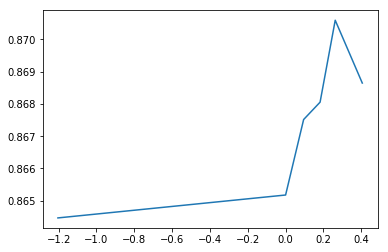

,learning Rate,Area under ROC
0,0.3,0.864468
1,1.0,0.865177
2,1.1,0.867516
3,1.2,0.868054
4,1.3,0.870592
5,1.5,0.868646


In [33]:
#Adaboost Hyperparameter tuning - learning rate, with base estimator DTC(maax depth = 1)

a=[]
b=[]
for i in [0.3,1,1.1,1.2,1.3,1.5]:
    print(i)
    a.append(i)
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1),learning_rate=i)
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(np.log(a),b)
plt.show()
res = pd.DataFrame()
res['learning Rate'] = a
res['Area under ROC'] = b
res

0.3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


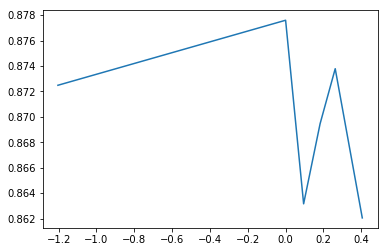

,learning Rate,Area under ROC
0,0.3,0.872480
1,1.0,0.877593
2,1.1,0.863159
3,1.2,0.869453
4,1.3,0.873783
5,1.5,0.862050


In [34]:
#Adaboost Hyperparameter tuning - learning rate, with base estimator DTC(maax depth = 2)

a=[]
b=[]
for i in [0.3,1,1.1,1.2,1.3,1.5]:
    print(i)
    a.append(i)
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),learning_rate=i)
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(np.log(a),b)
plt.show()
res = pd.DataFrame()
res['learning Rate'] = a
res['Area under ROC'] = b
res

1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


21


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


29


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


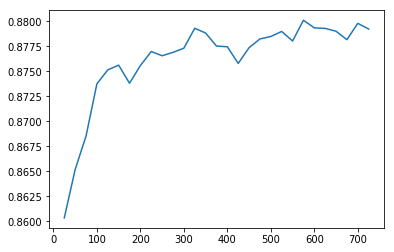

,n_estimators,Area under ROC
0,25,0.860332
1,50,0.865177
2,75,0.868530
3,100,0.873757
4,125,0.875149
5,150,0.875628
6,175,0.873816
7,200,0.875588
8,225,0.876992
9,250,0.876569


In [35]:
#Adaboost Hyperparameter tuning - n_estimators, with base estimator DTC(maax depth = 1)(by default)

a=[]
b=[]
for i in range(1,30):
    print(i)
    a.append(i*25)
    model = AdaBoostClassifier(n_estimators = i * 25)
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(a,b)
plt.show()
res = pd.DataFrame()
res['n_estimators'] = a
res['Area under ROC'] = b
res

1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


16


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


17


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


20


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


21


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


23


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


26


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


27


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


29


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


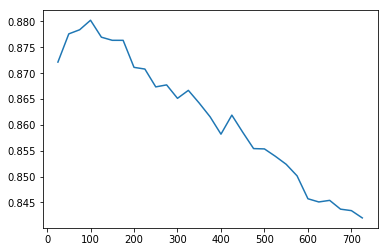

,n_estimators,Area under ROC
0,25,0.872139
1,50,0.877593
2,75,0.878391
3,100,0.880230
4,125,0.876953
5,150,0.876351
6,175,0.876346
7,200,0.871122
8,225,0.870795
9,250,0.867347


In [36]:
#Adaboost Hyperparameter tuning - n_estimators, with base estimator DTC(maax depth = 2)

a=[]
b=[]
for i in range(1,30):
    print(i)
    a.append(i*25)
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2),n_estimators = i * 25)
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(a,b)
plt.show()
res = pd.DataFrame()
res['n_estimators'] = a
res['Area under ROC'] = b
res

1


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


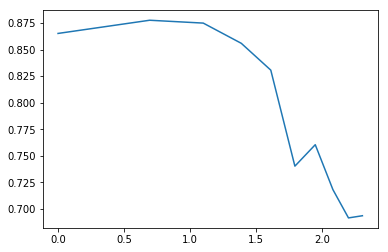

,DTC max-depth,Area under ROC
0,1,0.865177
1,2,0.877593
2,3,0.874907
3,4,0.855878
4,5,0.830625
5,6,0.740267
6,7,0.760456
7,8,0.718179
8,9,0.691544
9,10,0.693595


In [37]:
#Adaboost Hyperparameter tuning of base estimator i.e. Decision Tree
#DTC max-depth

a=[]
b=[]
for i in [1,2,3,4,5,6,7,8,9,10]:
    print(i)
    a.append(i)
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=i))
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(np.log(a),b)
plt.show()
res = pd.DataFrame()
res['DTC max-depth'] = a
res['Area under ROC'] = b
res

2


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


7


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


8


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9


/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


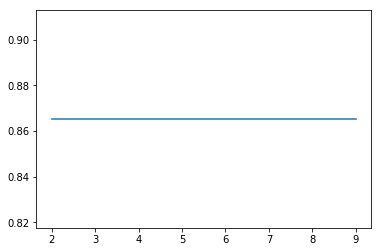

,DTC min_sample_split,Area under ROC
0,2,0.865177
1,3,0.865177
2,4,0.865177
3,5,0.865177
4,6,0.865177
5,7,0.865177
6,8,0.865177
7,9,0.865177


In [38]:
#Adaboost Hyperparameter tuning of base estimator i.e. Decision Tree
#DTC min_sample_split

a=[]
b=[]
for i in range(2,10):
    print(i)
    a.append(i)
    model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,min_samples_split = i))
    model.fit(X_train_res,y_train_res)
    em = []
    em.append('Ada Boost Classifier')
    y_pred = model.predict(X_cv)
    y_pred=list(y_pred)
    acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
    b.append(roc)
plt.plot(a,b)
plt.show()
res = pd.DataFrame()
res['DTC min_sample_split'] = a
res['Area under ROC'] = b
res

In [39]:
#Running GridSearchCV to find optimal parameters

rf_temp = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))        #Initialize the classifier object

parameters = {'n_estimators':[475,500,525],'learning_rate':[0.8,0.9,1]}    #Dictionary of parameters


grid_obj = GridSearchCV(rf_temp, parameters,scoring = 'roc_auc')         #Initialize a GridSearchCV object with above parameters,scorer and classifier

grid_fit = grid_obj.fit(X_train_res, y_train_res)        #Fit the gridsearch object with X_train,y_train

best_rf = grid_fit.best_estimator_         #Get the best estimator. For this, check documentation of GridSearchCV object

print(grid_fit.best_params_)

/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

{'learning_rate': 1, 'n_estimators': 525}


## Final Model Used

In [40]:
#AFTER FINDING THE OPTIMAL PARAMETERS (DTC WITH MAX DEPTH 1, N_ESTIMATORS OF ADABOOST AS 575, LEARNING RATE=1)

model = AdaBoostClassifier(base_estimator =DecisionTreeClassifier(max_depth=1), n_estimators=575, learning_rate=1)
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_cv)
y_pred=list(y_pred)
acc,rec,pre,f1,roc = performance_metrics(y_cv,y_pred)
print(roc)

/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8801232064524617


## Preparing Test Set

In [41]:
#IMPORTING TEST SET

test_raw = pd.read_csv('test_1.csv', sep = ',', na_values = '?')


In [42]:
test_raw.describe()

,ID,Age,IC,OC,Timely Income,Gain,Loss,Stock,Weight,NOP,Own/Self,Vet_Benefits,Weaks,WorkingPeriod
count,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000
mean,99605.534922,34.514062,15.357113,11.325573,55.990887,411.995629,36.789988,198.420888,1741.492058,1.959597,0.174874,1.515288,23.184701,94.498206
std,57577.768752,22.331829,18.063913,14.463178,273.655349,4447.976412,271.175531,2018.996134,994.675257,2.366813,0.552743,0.851352,24.413068,0.499999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,49744.500000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1062.380000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,99591.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1618.890000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,149329.000000,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2187.360000,4.000000,0.000000,2.000000,52.000000,95.000000
max,199519.000000,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,16349.200000,6.000000,2.000000,2.000000,52.000000,95.000000


In [43]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99523 entries, 0 to 99522
Data columns (total 42 columns):
ID               99523 non-null int64
Age              99523 non-null int64
Worker Class     49502 non-null object
IC               99523 non-null int64
OC               99523 non-null int64
Schooling        99523 non-null object
Timely Income    99523 non-null int64
Enrolled         6257 non-null object
Married_Life     99523 non-null object
MIC              49311 non-null object
MOC              49311 non-null object
Cast             99523 non-null object
Hispanic         99089 non-null object
Sex              99523 non-null object
MLU              9651 non-null object
Reason           2966 non-null object
Full/Part        99523 non-null object
Gain             99523 non-null int64
Loss             99523 non-null int64
Stock            99523 non-null int64
Tax Status       99523 non-null object
Area             7940 non-null object
State            7584 non-null object
Detaile

In [44]:
tst_idx = test_raw['ID']

In [45]:
#DROPPING 'ID' COLUMN FROM TEST SET

test_raw.drop(['ID'],axis=1,inplace=True)

In [46]:
test_raw.head()

,Age,Worker Class,IC,OC,Schooling,Timely Income,Enrolled,Married_Life,MIC,MOC,...,Teen,COB FATHER,COB MOTHER,COB SELF,Citizen,Own/Self,Fill,Vet_Benefits,Weaks,WorkingPeriod
0,57,WC1,1,44,Edu9,0,NaN,MS5,MIC_U,MOC_L,...,NaN,c24,c24,c24,Case1,0,NaN,2,52,94
1,6,NaN,0,0,Edu4,0,NaN,MS3,NaN,NaN,...,F,c24,c24,c24,Case1,0,NaN,0,0,94
2,16,WC2,43,31,Edu14,0,Uni1,MS3,MIC_D,MOC_G,...,N,c24,c24,c24,Case1,0,NaN,2,0,95
3,56,NaN,0,0,Edu16,0,NaN,MS2,NaN,NaN,...,NaN,c24,c24,c24,Case1,0,NaN,2,0,95
4,6,NaN,0,0,Edu4,0,NaN,MS3,NaN,NaN,...,B,c27,c24,c24,Case1,0,NaN,0,0,95


In [47]:
#REMOVING FEATURES WITH NUMBER OF MISSING VALUES > 0.5 OF THE TEST SET


test_raw  = test_raw[test_raw.columns[test_raw.isnull().mean() < 0.5]]

In [48]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99523 entries, 0 to 99522
Data columns (total 26 columns):
Age              99523 non-null int64
IC               99523 non-null int64
OC               99523 non-null int64
Schooling        99523 non-null object
Timely Income    99523 non-null int64
Married_Life     99523 non-null object
Cast             99523 non-null object
Hispanic         99089 non-null object
Sex              99523 non-null object
Full/Part        99523 non-null object
Gain             99523 non-null int64
Loss             99523 non-null int64
Stock            99523 non-null int64
Tax Status       99523 non-null object
Detailed         99523 non-null object
Summary          99523 non-null object
Weight           99523 non-null float64
NOP              99523 non-null int64
COB FATHER       96182 non-null object
COB MOTHER       96461 non-null object
COB SELF         97827 non-null object
Citizen          99523 non-null object
Own/Self         99523 non-null int64
Ve

In [49]:
#FILLING NA VALUES OF CATEGORICAL COLUMNS WITH MODE

a = ['Hispanic','COB FATHER','COB MOTHER','COB SELF']
for i in a:
    test_raw[i].fillna(test_raw[i].mode()[0] ,inplace= True)
    

In [50]:
#LABEL ENCODING

le = LabelEncoder()

for col in test_raw.columns:
    if(test_raw[col].dtype == np.object):
        le.fit(test_raw[col])
        test_raw[col] = le.transform(test_raw[col])

In [51]:
#Performing Min_Max Normalization

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled_test = min_max_scaler.fit_transform(test_raw)
test_raw = pd.DataFrame(np_scaled_test)
test_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.633333,0.019608,0.956522,1.0000,0.0,0.666667,0.00,0.5,1.0,0.142857,...,0.125630,0.166667,0.390244,0.390244,0.390244,0.0,0.0,1.0,1.0,0.0
1,0.066667,0.000000,0.000000,0.6875,0.0,0.333333,0.00,0.0,0.0,0.142857,...,0.057735,0.000000,0.390244,0.390244,0.390244,0.0,0.0,0.0,0.0,0.0
2,0.177778,0.843137,0.673913,0.3125,0.0,0.333333,0.75,0.0,0.0,0.000000,...,0.181206,0.000000,0.390244,0.390244,0.390244,0.0,0.0,1.0,0.0,1.0
3,0.622222,0.000000,0.000000,0.4375,0.0,0.166667,0.00,0.0,0.0,0.000000,...,0.133555,0.000000,0.390244,0.390244,0.390244,0.0,0.0,1.0,0.0,1.0
4,0.066667,0.000000,0.000000,0.6875,0.0,0.333333,0.00,0.0,1.0,0.142857,...,0.024020,0.000000,0.463415,0.390244,0.390244,0.0,0.0,0.0,0.0,1.0


In [52]:
test_raw.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.00000,99523.000000,99523.000000,...,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000,99523.000000
mean,0.383490,0.301120,0.246208,0.471983,0.005600,0.386991,0.108377,0.06602,0.480512,0.173670,...,0.104444,0.326600,0.424684,0.423821,0.407569,0.045821,0.087437,0.757644,0.445860,0.498206
std,0.248131,0.354194,0.314417,0.320667,0.027368,0.147775,0.262908,0.18009,0.499623,0.134080,...,0.060981,0.394469,0.134675,0.133088,0.099170,0.148991,0.276372,0.425676,0.469482,0.499999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.000000,0.062500,0.000000,0.333333,0.000000,0.00000,0.000000,0.142857,...,0.062810,0.000000,0.390244,0.390244,0.390244,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.366667,0.000000,0.000000,0.562500,0.000000,0.333333,0.000000,0.00000,0.000000,0.142857,...,0.096928,0.166667,0.390244,0.390244,0.390244,0.000000,0.000000,1.000000,0.153846,0.000000
75%,0.555556,0.647059,0.565217,0.687500,0.000000,0.500000,0.000000,0.00000,1.000000,0.142857,...,0.131779,0.666667,0.390244,0.390244,0.390244,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Running Chosen Model on Test Set

In [53]:
#RUNNING THE MODEL WITH OPTIMAL PARAMETERS CHOSEN AND PREDICTING CLASSES OF THE TEST SET

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators = 575,learning_rate=1)
model.fit(X_train_res,y_train_res)
y_pred_tst = model.predict(test_raw)



/home/raghav/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
#CONVERTING THE RESULT INTO A LIST

y_pred_tst = list(y_pred_tst)

In [55]:
#ADDING CLASS COLUMN IN TEST SET

test_raw['Class'] = y_pred_tst

In [56]:
#CREATING SUBMISSION FILE WITH TEST 'ID' COLUMN AND PREDICTED CLASS COLUMN

pd.concat([tst_idx,test_raw['Class']],axis = 1).to_csv('DM_FINAL_SUB.csv',index = False)